# Introdução aos Métodos Discretos

Nome: Yago Pereira dos Anjos Santos

## 1) Demostre a fórmula da diferença unilateral à esquerda.




Considerando a expansão de Taylor em torno de um ponto $x_{i}$, temos:
\begin{align*}
    &f(x_{i-1}) = f(x_{i}) - f'(x_{i})\,h + \frac{f''(x_{i})}{2}\,h^{2} + O_{1}(h^{3}), \\
    &f(x_{i-2}) = f(x_{i}) -2\,f'(x_{i})\,h + 2\,f''(x_{i})\,h^{2} + O_{2}(h^{3}).
\end{align*}
Multiplicando a primeira equação por 4 e subtraindo do resultado obtido a segunda equação, temos $4\,f(x_{i-1}) - f(x_{i-2}) = 3\,f(x_{i}) -2\,f'(x_{i})\,h + O_{3}(h^{3})$. Isolando o termo da derivada primeira, segue que $2\,f'(x_{i})\,h = -4\,f(x_{i-1}) + f(x_{i-2}) + 3\,f(x_{i}) + O_{3}(h^{3})$. Logo, a fórmula da diferença unilateral à esquerda é dada por:
\begin{align*}
    f'(x_{i}) = \frac{f(x_{i-2}) -4\,f(x_{i-1}) + 3\,f(x_{i})}{2\,h} + O(h^{2}).
\end{align*}
Portanto, na prática aproximamos a derivada pela diferença unilateral à esquerda por $\displaystyle f'(x_{i}) = \frac{f(x_{i-2}) -4\,f(x_{i-1}) + 3\,f(x_{i})}{2\,h}$.

## 2) Aproxime a derivada de primeira ordem da função  $f(x)=sen(x)$ utilizando a diferenças finitas $O(h^2)$ utilizando $h=0.1$ e $h=0.01$ para $x\in[0,1]$. Plote a derivada analítica e as aproximadas para comparar os resultados.



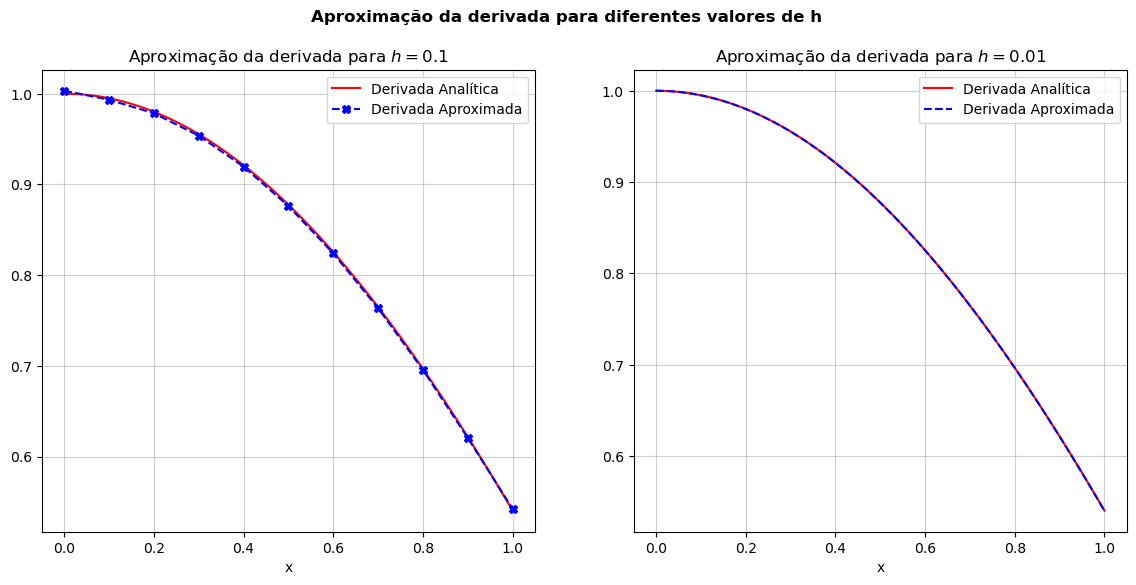

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Função f dada pelo problema
def f(x):
    return np.sin(x)


# Aproximação da derivada por diferença unilateral à direita
def diff_uni_d(f, x, h):
    Df = (-f(x + 2*h) + 4*f(x + h) - 3*f(x))/(2*h)
    return Df


# Aproximação da derivada por diferença unilateral à esquerda
def diff_uni_e(f, x, h):
    Df = (3*f(x) - 4*f(x - h) + f(x - 2*h))/(2*h)
    return Df


# Aproximação da derivada por diferença centrada
def diff_cent(f, x, h):
    Df = (f(x + h) - f(x - h))/(2*h)
    return Df


# Aproximação para a derivada no domínio [0, 1]
def diff(f, u, h):
    solucao = []
    
    for x in u:
        if x == 0:
            solucao.append(diff_uni_d(f, x, h))
        elif x == 1:
            solucao.append(diff_uni_e(f, x, h))
        else:
            solucao.append(diff_cent(f, x, h))

    return np.array(solucao)


h = np.array([0.1, 0.01])

x_i = np.linspace(0, 1, 100)
func = np.cos(x_i)

x = np.arange(0., 1 + h[0], h[0])
df1dx = diff(f, x, h[0])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x_i, func, c='r', label='Derivada Analítica', zorder=2)
plt.plot(x, df1dx, c='b', marker='X', ls='--', label='Derivada Aproximada', zorder=3)
plt.title(f'Aproximação da derivada para $h = {h[0]}$')
plt.xlabel('x')
plt.grid(alpha=0.6)
plt.legend()

x = np.arange(0., 1 + h[1], h[1])
df2dx = diff(f, x, h[1])
plt.subplot(1, 2, 2)
plt.plot(x_i, func, c='r', label='Derivada Analítica', zorder=2)
plt.plot(x, df2dx, c='b', ls='--', label='Derivada Aproximada', zorder=3)
plt.title(f'Aproximação da derivada para $h = {h[1]}$')
plt.xlabel('x')
plt.grid(alpha=0.6)
plt.legend()

plt.suptitle('Aproximação da derivada para diferentes valores de h', fontweight='bold')
plt.show()

## 3) Utilizando a função  $f(x)=sen(x)$ , mostre que o erro diferença progressiva e diferença centrada decrescem em $O(h)$ e $O(h^2)$, respectivamente. Para isso faça o que se pede:




### a) Tomando $h\in[10^{-5}, 10^{0}]$, plote, em escala log-log, o gráfico de $h$ versus erro absoluto e calcule a inclinação destas retas.

Para cada $h \in [10^{-5}, 10^{0}]$ é feita a aproximação da derivada da função $f(x) = \sin(x)$ no ponto $x = 0.5$, tanto para a diferenção progressiva quanto para a diferença centrada. Para cada uma dessas aproximações é calculado o erro absoluto associado. Para a aproximação feita com a diferença progressiva, os erros absolutos são armazenados na lista `erro_diff_prog`. Ao plotar o gráfico de $h$ versus $E(h) =$ `erro_diff_prog` (erro absoluto) em escala log-log, observa-se que o gráfico obtido é uma reta. Desta forma, o fenômeno é descrito por uma lei de potência, isto é, $E(h) \approx C\,h^{k}$, onde $k$ e $C$ são constantes. Aplicando $\log$, temos:
$$\log(E(h)) \approx \log(C\,h^{k}) \Rightarrow \log(E(h)) \approx \log(C) + k\,\log(h).$$
Assim, fazendo $Y = \log(E(h))$, $X = \log(h)$, $a = k$ e $b = \log(C)$. Desta forma, em escala log-log, temos a reta $Y \approx b + a\,X$, em que $a = k$ é o coeficiente angular da reta. O cálculo da inclinação da reta a partir do gráfico para o caso da diferença progressiva é feito da seguinte maneira:
\begin{align*}
    coeficiente\_prog = \frac{\log(erro\_diff\_prog[-1]) - \log(erro\_diff\_prog[0])}{\log(h[-1]) - \log(h[0])} = 1.0352040059418497.
\end{align*}
Desta forma, o coeficiente angular é aproximadamente $1$. Logo, para o caso da diferença progressiva, o erro absoluto $E(h)$ se mostrou proporcional a aproximadamente $h$, isto é, o erro decresce em $O(h)$.

Para a aproximação feita com a diferença centrada , os erros absolutos são armazenados na lista `erro_diff_cent`. Em seguida, plota-se o gráfico de $h$ versus $E(h) =$ `erro_diff_cent` (erro absoluto) em escala log-log. O gráfico obtido é uma reta e a inclinação da mesma é calculada da seguinte maneira:
\begin{align*}
    coeficiente\_cent = \frac{\log(erro\_diff\_cent[-1]) - \log(erro\_diff\_cent[0])}{\log(h[-1]) - \log(h[0])} = 1.9800546517199795.
\end{align*}
Diante disto, o coeficiente angular é aproximadamente $2$. Portanto, para o caso da diferença centrada, o erro absoluto $E(h)$ se mostrou proporcial a aproximadamente $h^{2}$, isto é, o erro decresce em $O(h^{2})$.

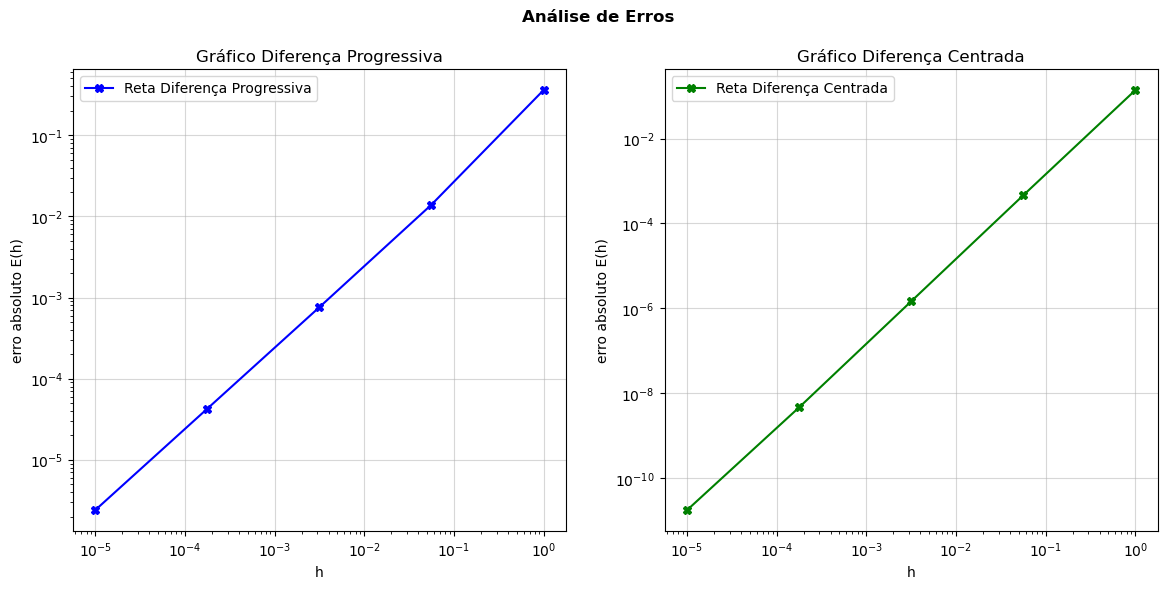

Inclinação da reta diferença progressiva: 1.0352040059418497.
Inclinação da reta diferença centrada: 1.9800546517199795.


In [2]:
# Aproximação da derivada por diferença progressiva
def diff_prog(f, x, h):
    Df = (f(x + h) - f(x))/(h)
    return Df


x = 0.5  # Ponto em que vamos aproximar a derivada
h = np.logspace(-5, 0, 5)  # Gerando pontos de 10^{-5} até 10^{0}

# Gerando uma lista de aproximações por diferença progressiva para cada valor de h
aproximacao = [diff_prog(f, x, k) for k in h]
# Calculando os erros absolutos a partir das aproximações
erro_diff_prog = [np.abs(t - np.cos(x)) for t in aproximacao]

# Plotando o gráfico de h versus erro absoluto em escala log-log
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.loglog(h, erro_diff_prog, c='b', marker='X', label='Reta Diferença Progressiva')
plt.grid(alpha=0.5)
plt.title('Gráfico Diferença Progressiva')
plt.ylabel('erro absoluto E(h)')
plt.xlabel('h')
plt.legend()

# Cálculo da inclinação da reta para o caso diferença progressiva
coeficiente_prog = (np.log10(erro_diff_prog[-1]) - np.log10(erro_diff_prog[0]))/(np.log10(h[-1]) - np.log10(h[0]))

# Gerando uma lista de aproximações por diferença centrada para cada valor de h
aproximacao = [diff_cent(f, x, k) for k in h]
# Calculando os erros absolutos a partir das aproximações
erro_diff_cent = [np.abs(t - np.cos(x)) for t in aproximacao]

# Plotando o gráfico de h versus erro absoluto em escala log-log
plt.subplot(1, 2, 2)
plt.loglog(h, erro_diff_cent, c='g', marker='X', label='Reta Diferença Centrada')
plt.grid(alpha=0.5)
plt.title('Gráfico Diferença Centrada')
plt.ylabel('erro absoluto E(h)')
plt.xlabel('h')
plt.legend()

plt.suptitle('Análise de Erros', fontweight='bold')
plt.show()

# Cálculo da inclinação da reta para o caso da diferença centrada
coeficiente_cent = (np.log10(erro_diff_cent[-1]) - np.log10(erro_diff_cent[0]))/(np.log10(h[-1]) - np.log10(h[0]))

print(f'Inclinação da reta diferença progressiva: {coeficiente_prog}.')
print(f'Inclinação da reta diferença centrada: {coeficiente_cent}.')

### b) Tomando $h\in[10^{-20}, 10^{0}]$, plote, em escala log-log, o gráfico de $h$ versus erro absoluto. O que aconteceu e por quê?

Vamos observar primeiramente o caso da diferença progressiva. Neste caso observa-se que, ao plotar o gráfico de $h$ versus $E(h) =$ `erro_diff_prog` (erro absoluto), ocorre ruído nos dados para valores de $h$ aproximadamente menores do que $10^{-7}$. Isso ocorre porque para valores de $h$ muito pequenos, $f(x + h)$ e $f(x)$ são muito próximos um do outro, de modo que a diferença $f(x+h) - f(x)$ é muito próxima de zero. Isso implica em erros de cancelamento e perdas na precisão dos resultados devido a arredondamentos. Além disso, dividir a diferença $f(x + h) - f(x)$ por valores de $h$ muito pequenos aumenta ainda mais o erro e a imprecisão na aproximação na derivada. Em resumo, no caso analítico, quanto menor for o valor de $h$, mais precisa é aproximação da derivada. No entanto, na aritmética de ponto flutuante, para valores de $h$ muito pequenos, incorrem erros de cancelamento, o que faz com que o erro na aproximação da derivada aumente. Dito isso, fazemos o cálculo da inclinação da reta para valores de $h$ em que a catástrofe de cancelamento não ocorre. Para tanto, pegamos os dois últimos pontos para efetuar o cálculo.
\begin{align*}
    coeficiente\_prog = \frac{\log(erro\_diff\_prog[-1]) - \log(erro\_diff\_prog[-2])}{\log(h[-1]) - \log(h[-2])} = 1.0784976354218871.
\end{align*}
Logo, o a inclinação da reta neste caso é aproximadamente $1$, de modo que o erro decresce em $O(h)$.

Para o caso da diferença centrada observa-se um comportamento análogo, com o ruído sendo observado para valores de $h$ aproximadamente menores do que $10^{-4}$. Aqui também temos o erro de cancelamento, $f(x + h) - f(x-h)$ são próximos de zero para valores muito pequenos de $h$. Além disso, como $h$ é pequeno, ao se dividir a diferença $f(x+h) - f(x-h)$ por $2\,h$, aumenta-se ainda mais o erro e a imprecisão na aproximação da derivada. Diante disso, neste caso também fazemos o cálculo da inclinação da reta para valores de $h$ antes da ocorrência da catástrofe de cancelamento. Assim, efetua-se o cálculo com os dois últimos pontos.
\begin{align*}
    coeficiente\_cent = \frac{\log(erro\_diff\_cent[-1]) - \log(erro\_diff\_cent[0])}{\log(h[-1]) - \log(h[0])} = 1.9902173567075578.
\end{align*}
Logo, a inclinação da reta para o caso da diferença centrada é aproximadamente $2$, de modo que o erro decresce em $O(h^{2})$.

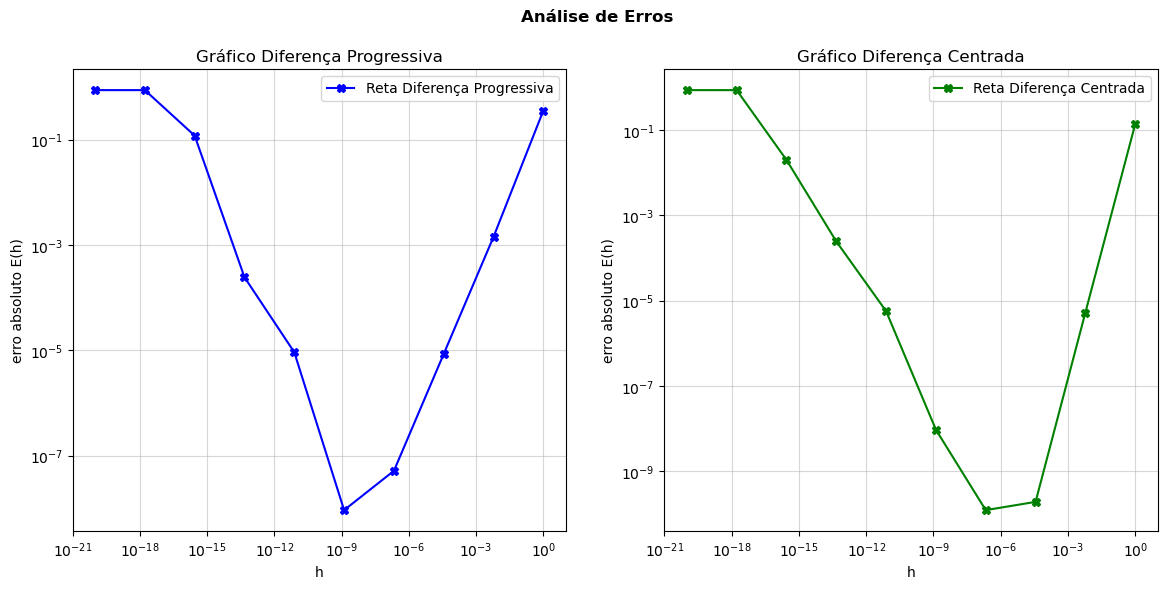

Inclinação diferença progressiva: 1.0784976354218871.
Inclinação diferença centrada: 1.9902173567075578.


In [3]:
h = np.logspace(-20, 0, 10)  # Gerando pontos de 10^{-20} até 10^{0}

# Gerando uma lista de aproximações por diferença progressiva para cada valor de h
aproximacao = [diff_prog(f, x, k) for k in h]
# Calculando os erros absolutos a partir das aproximações
erro_diff_prog = [np.abs(t - np.cos(x)) for t in aproximacao]

# Plotando o gráfico de h versus erro absoluto em escala log-log (Diferença Progressiva)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.loglog(h, erro_diff_prog, c='b', marker='X', label='Reta Diferença Progressiva')
plt.grid(alpha=0.5)
plt.title('Gráfico Diferença Progressiva')
plt.ylabel('erro absoluto E(h)')
plt.xlabel('h')
plt.legend()

coeficiente_prog = (np.log10(erro_diff_prog[-1]) - np.log10(erro_diff_prog[-2]))/(np.log10(h[-1]) - np.log10(h[-2]))

# Gerando uma lista de aproximações por diferença centrada para cada valor de h
aproximacao = [diff_cent(f, x, k) for k in h]
# Calculando os erros absolutos a partir das aproximações
erro_diff_cent = [np.abs(t - np.cos(x)) for t in aproximacao]

# Plotando o gráfico de h versus erro absoluto em escala log-log (Diferença Centrada)
plt.subplot(1, 2, 2)
plt.loglog(h, erro_diff_cent, c='g', marker='X', label='Reta Diferença Centrada')
plt.grid(alpha=0.5)
plt.title('Gráfico Diferença Centrada')
plt.ylabel('erro absoluto E(h)')
plt.xlabel('h')
plt.legend()

plt.suptitle('Análise de Erros', fontweight='bold')
plt.show()

coeficiente_cent = (np.log10(erro_diff_cent[-1]) - np.log10(erro_diff_cent[-2]))/(np.log10(h[-1]) - np.log10(h[-2]))

print(f'Inclinação diferença progressiva: {coeficiente_prog}.')
print(f'Inclinação diferença centrada: {coeficiente_cent}.')